In [2]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('Toyota_SimpleReg.csv', encoding= 'unicode_escape')
print('shape of data', data.shape)

shape of data (1436, 4)


In [4]:
data.head()

,Id,Model,Price,Age_06_15
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,57
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,57
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,58
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,60
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,64


In [5]:
data.tail()


,Id,Model,Price,Age_06_15
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,103
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,106
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,105
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,104
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,110


In [6]:
# let's rename the column 'Age_06_15' to just 'Age'
data.rename(columns = {'Age_06_15' : 'Age'}, inplace=True)
list(data.columns)

['Id', 'Model', 'Price', 'Age']

In [7]:
# let's drop Id and Model columns
col_drop = ['Id', 'Model']
for item in col_drop:
    del data[item]

list(data.columns)


['Price', 'Age']

In [8]:
# check for NA values
data.isnull().sum()


Price    0
Age      0
dtype: int64

In [9]:
# move column 'Price' to last for simplicity
data = data[['Age', 'Price']]
list(data.columns)

['Age', 'Price']

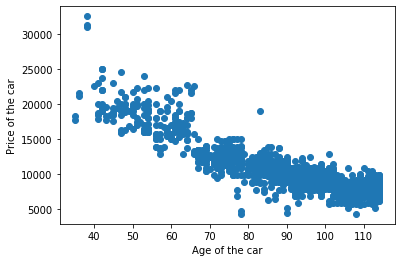

In [10]:
# plot x vs y to understand the relation
x1 = data['Age']
y = data['Price']
plt.scatter(x1, y)
plt.xlabel('Age of the car')
plt.ylabel('Price of the car')
plt.show()

In [11]:
# fit a model using StatModel's OLS (ordinary least squares)
model1 = sm.OLS(y,x1).fit()
model1.summary()

# adjusted r-squared value is 0.758 so our model is not really bad but also not the best
# p-value of independent variable 'Age' is < 0.05 hence it is a good predictor of dependent variable 'Price'

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              4509.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        18:56:42   Log-Likelihood:                         -14422.
No. Observations:                1436   AIC:                                  2.885e+04
Df Residuals:                    1435   BIC:                                  2.885e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age          107.4076      1.600     67.149      0.000     104.270     110.545
==============================================================================
Omnibus:                      341.066   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              676.694
Skew:                           1.395   Prob(JB):                    1.14e-147
Kurtosis:                       4.879   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# let's see if an intercept in the model will make a difference
x = sm.add_constant(x1)
model2 = sm.OLS(y, x).fit()
model2.summary()

# adjusted r-squared value is 0.768 so our new is an improvement over the last one
# p-value of constant variable is < 0.05 hence it is good to be in model
# probability of f-stat is < 0.05. Hence there is evidence that there's good amount of linear relationship between 
# target and independent variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:56:42   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.611e+04    227.608    114.696      0.000    2.57e+04    2.66e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

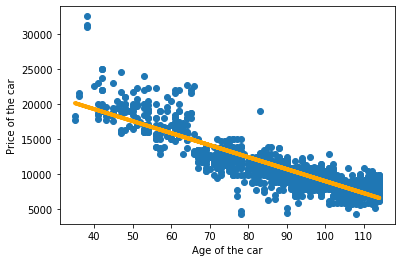

In [13]:
# Model visualization using model2 metrics
plt.scatter(x1, y)
y_hat = 26110 - (x1*170.9336)
fig = plt.plot(x1, y_hat, lw=4, c='orange', label='RegressionLine')
plt.xlabel('Age of the car')
plt.ylabel('Price of the car')
plt.show()

In [15]:
# Bonus: Let us build a model using sci-kit learn's LinearRegression
X = x1.values.reshape(-1,1)
Y = y.values.reshape(-1,1)
sk_learn_model = LinearRegression()
sk_learn_model.fit(X, Y)
print(sk_learn_model.coef_)
print(sk_learn_model.intercept_)

# it can be observed that co-eff and intercept values of sk-learn and OLS are almost identical. 
# granted this shouldn't be the only measure to compare two models, its a good indicator that they would perform 
# similar, nonetheless.

[[-170.93358501]]
[26105.8005393]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
